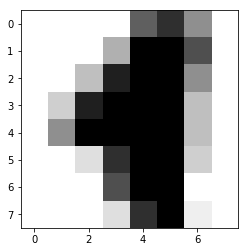

In [108]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split
%matplotlib inline

X, y = ds.load_digits(n_class=2, return_X_y=True)
plt.imshow(X[50].reshape((8, 8)), cmap='binary')
l = len(X)


In [109]:
X = torch.LongTensor(X)
y = torch.LongTensor(y)
data = TensorDataset(X, y)
train_data, test_data, val_data = random_split(data, [int(l * 0.7), int(l * 0.2), l - int(l * 0.7) - int(l * 0.2)])


In [112]:
class Lin(torch.nn.Module):
    def __init__(self, input):
        super(Lin, self).__init__()
        self.linear = nn.Linear(input, 2)

    def forward(self, x):
        out = torch.nn.Sigmoid(self.linear(x))
        return out


input = 8 * 8
#output = 2
model = Lin(input)


In [113]:
def train_model(model, train_data, test_data, val_data, max_epochs=30):
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
    train_loader = DataLoader(dataset=train_data, batch_size=20, shuffle=True)
    test_loader = DataLoader(dataset=test_data, batch_size=20, shuffle=True)
    val_loader = DataLoader(dataset=val_data, batch_size=30, shuffle=True)
    for epoch in range(max_epochs):
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            model.train()
            optimizer.zero_grad()
            y_pred = model(X_batch.float())
            loss = nn.CrossEntropyLoss(y_pred, y_batch)
            total += y_batch.size(0)
            correct += (y_pred.argmax(1) == y_batch).sum().item()

            loss.backward()
            optimizer.step()
            if epoch % 3 == 2:
                acc = correct / total
                print(f'Epoch = {epoch}, acc = {acc}, loss = {loss}')

train_model(model, train_data, test_data, val_data, max_epochs=30)


TypeError: __init__() takes 1 positional argument but 2 were given